## Statistics for Data Science Week 7 Project: Boston Housing Analysis

First, we import the standard libraries needed for analysis.

In [249]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import scipy.stats
from sklearn.linear_model import LinearRegression
!pip install tabulate


Next, we import the dataset for the project from the specified URL.

In [4]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

## Understanding of Data
The descrption of each data field is provided as below:

|Field|Description|
|-----|-----------|
|CRIM|per capita crime rate by town|
|ZN|proportion of residential land zoned for lots over 25,000 sq.ft.|
|INDUS|proportion of non-retail business acres per town.|
|CHAS|Charles River dummy variable (1 if tract bounds river; 0 otherwise) |
|NOX|nitric oxides concentration (parts per 10 million)|
|RM|average number of rooms per dwelling|
|AGE|proportion of owner-occupied units built prior to 1940|
|DIS|weighted distances to five Boston employment centres|
|TAX|full-value property-tax rate per 10,000 dollars|
|PTRATIO|pupil-teacher ratio by town|
|LSTAT|percent lower status of the population|
|MEDV|Median value of owner-occupied homes in $1000's|

We confirm that the download was succesful by printing the last few lines of dataset. WE see that there are 505 rows, and that all columns have column names except column 0, which appears to be an index column.

In [154]:
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,>70 years
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


Using .info() and .describe(), we can quickly obtain basic information about the dataset, such as the dimesions, the number of non-null items, the data-type of each feature, and the mean, median, quartiles, etc. of each feature.

In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


We see that there are 505 rows of data (1 for the header?) and that there are no null values. Column 0, the index column, is an integer, and all other columns are floats.

In [9]:
#boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Visual Analysis

To further understand the nature of each asset, we plot several box, scatter, and histogram plots of the data:

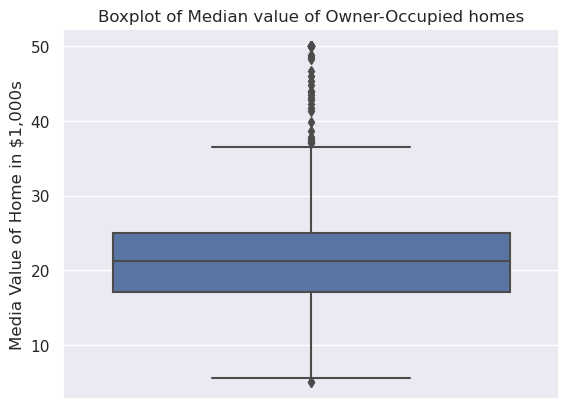

Mean:  22.53
Min:  5.0
Max:  50.0
Median:  21.2
Inter-quartile Range: 25.0 - 17.025 = 7.98


In [257]:
#For the "Median value of owner-occupied homes" provide a boxplot

ax = sns.boxplot(y='MEDV', data=boston_df)
plt.ylabel('Media Value of Home in $1,000s')
plt.title('Boxplot of Median value of Owner-Occupied homes')
plt.show() 

#Find interquartile range
q3, q1 = np.percentile(boston_df['MEDV'], [75 ,25])
iqr = round(q3 - q1,2)

print('Mean: ', round(boston_df['MEDV'].mean(),2))
print('Min: ', round(boston_df['MEDV'].min(),2))
print('Max: ', round(boston_df['MEDV'].max(),2))
print('Median: ', round(boston_df['MEDV'].median(),2))
print(f'Inter-quartile Range: {q3} - {q1} = {iqr}')

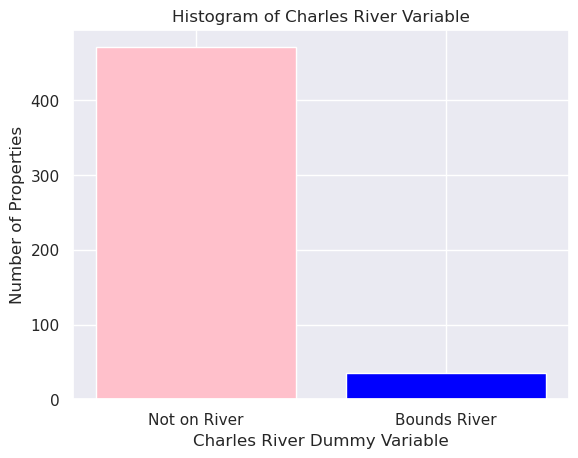

0.0    471
1.0     35
Name: CHAS, dtype: int64


In [59]:
#Provide a  bar plot for the Charles river variable
#We will count the number of entries with value 0 and with value 1

plt.bar(boston_df.CHAS.unique(),boston_df.CHAS.value_counts(),color=['pink','blue'])
plt.xticks([0,1],['Not on River','Bounds River'])
plt.title('Histogram of Charles River Variable')
plt.xlabel('Charles River Dummy Variable')
plt.ylabel('Number of Properties');
plt.show()

print(boston_df['CHAS'].value_counts())

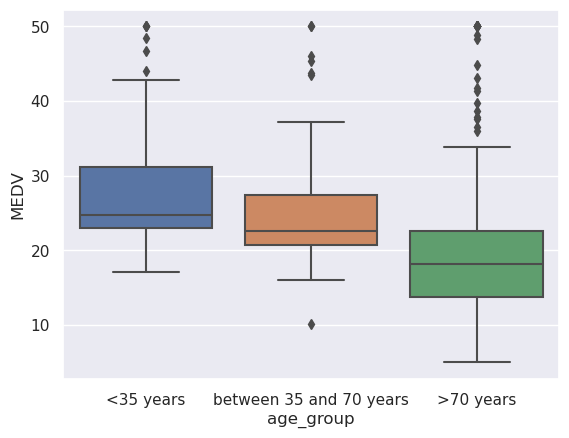

In [74]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
#First, we add a column called age_group to the data frame and specify the order of the age groups.
boston_df['age_group'] = pd.Categorical(boston_df['age_group'],
                                   categories=['<35 years', 'between 35 and 70 years', '>70 years'],
                                   ordered=True)
#Next, we assign an age group for each entry based on the value of the AGE variable
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '<35 years'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '>70 years'

#Finally, we create a box plot iusing the newly added age-group as the x-axis.
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)

plt.show() 

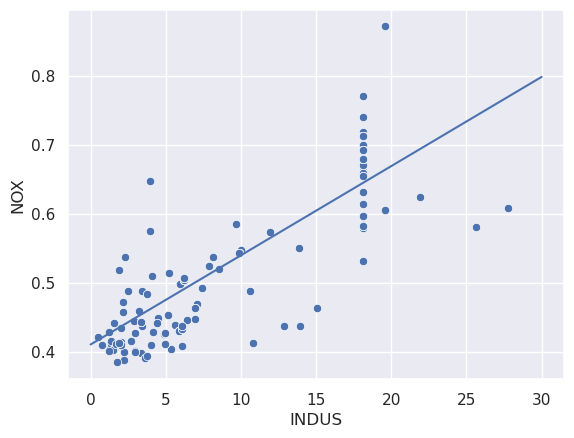

In [104]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
#What can you say about the relationship?
#We will use the NOX and the INDUS variables.

ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)


#set model to use as a linear regression model with a non-zero y-intercept 
model = LinearRegression(fit_intercept=True)

#In real life, we use an actual data set. Here we prepare a set of random numbers.
x = np.array(boston_df['INDUS'])
y = np.array(boston_df['NOX'])

#create the fit of the model
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 30, 506)
yfit = model.predict(xfit[:, np.newaxis])

#create line plot of fit values
plt.plot(xfit, yfit);

In [111]:
X, Y = boston_df[["INDUS"]], boston_df.NOX

model.fit(X,Y)

r_squared = model.score(X,Y)
print("R^2 :" , r_squared)


R^2 : 0.5831635323844071


We see a weak correlation between INDUS and NOX up to about 18% industrial space. For properties that are primarily industrial spaces, we see a wide-range of NOX concentrations.

Mode : 20.2
Mean : 18.5
Median : 19.1
-----------------------
[(12.6, 13.54), 15.0]
[(13.54, 14.48), 2.0]
[(14.48, 15.42), 58.0]
[(15.42, 16.36), 15.0]
[(16.36, 17.3), 35.0]
[(17.3, 18.24), 69.0]
[(18.24, 19.18), 76.0]
[(19.18, 20.12), 40.0]
[(20.12, 21.06), 178.0]
[(21.06, 22.0), 18.0]
-----------------------


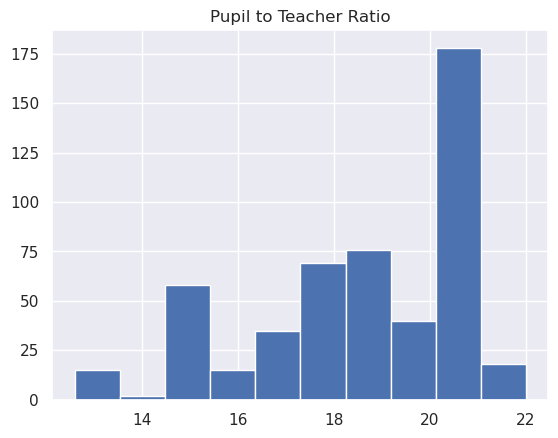

In [245]:
#Create a histogram for the pupil to teacher ratio variable
from tabulate import tabulate

n_plt, bins_plt, patches= plt.hist(boston_df["PTRATIO"],bins=10)
plt.title('Pupil to Teacher Ratio')

print("Mode :",boston_df["PTRATIO"].mode()[0])
print("Mean :",round(boston_df["PTRATIO"].mean(),1))
print("Median :", round(boston_df["PTRATIO"].median(),1))

results = [None]*10
for i in range(0,10):
    results[i]= ([[(round(bins_plt[i],2),round(bins_plt[i+1],2)),n_plt[i]]])

    
print(tabulate(results))

## Use the appropriate tests to answer the questions provided.
For each of the following questions;

1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:
* State your hypothesis.
* Use α = 0.05
* Perform the test Statistics.
* State the conclusion from the test.

### Question 1 
Is there a significant difference in median value of houses bounded by the Charles river or not? 

#### Null-hypothesis: 
There is no difference in the median value of the houses bounded by the Charles river and those not bound.

#### Method: 
Two-sided t-test with α = 0.05

In [252]:
#First we perform a Levene test to confirm if the two populations have equal variance

scipy.stats.levene(boston_df[boston_df['CHAS']==0]['MEDV'],boston_df[boston_df['CHAS']==1]['MEDV'],center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

As the P value is lower than 0.05, we reject the null hypothesis that the variances are equal. Therefore, we use the Welch's t-test for unequal variance.

In [254]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'],boston_df[boston_df['CHAS']==1]['MEDV'], equal_var = False)


Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

We find that the p value is lower than 0.05, and thus reject the null hypothesis that being bound the Charles River does not affect median housing prices. We can confirm the correlation by inspecting the box plots of the median housing price and the Charles River dummy variable.

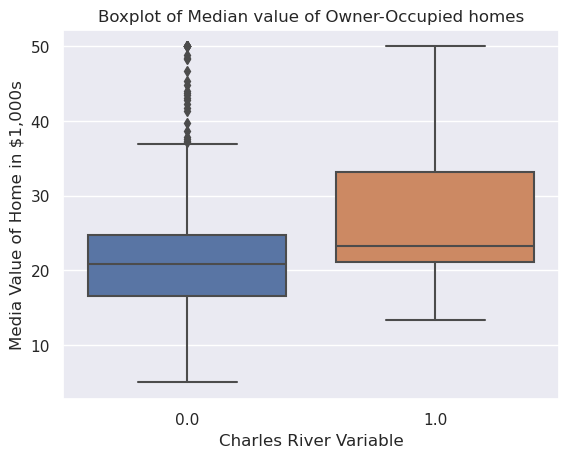

In [259]:
ax = sns.boxplot(x='CHAS',y='MEDV', data=boston_df)
plt.xlabel('Charles River Variable')
plt.ylabel('Media Value of Home in $1,000s')
plt.title('Boxplot of Median value of Owner-Occupied homes')
plt.show() 


### Question 2
Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? 

#### Null-hypothesis: 
There is no difference in the median value of the houses between the 3 different age groups <35 years, between 35 years and 70, and greater than 70 years.

#### Method: 
ANOVA

In [262]:
#First, we perform Levene's test to test if there is a signficant difference in the variance of each of the populations being compared.

UnderThirtyfive_medv=boston_df[boston_df['age_group'] == '<35 years']['MEDV']
Thirtyfive_to_Seventy_medv=boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
OverSeventy_medv=boston_df[boston_df['age_group'] == '>70 years']['MEDV']

scipy.stats.levene(UnderThirtyfive_medv,
                   Thirtyfive_to_Seventy_medv, 
                   OverSeventy_medv, 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

As the p-value of the Levene test is greater than 0.05, we fail to reject the null hypothesis, and assume that the variances of the three age groups are equal.

In [263]:
f_statistic, p_value = scipy.stats.f_oneway(UnderThirtyfive_medv,Thirtyfive_to_Seventy_medv,OverSeventy_medv)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


The p-value of the one-way F test is much less than 0.05. Therefore, we reject the null hypothesis that the means of the three populations are all equal. As seen in the box plot previously, we observed a significant decrease in median housing price for properties over 70 years.

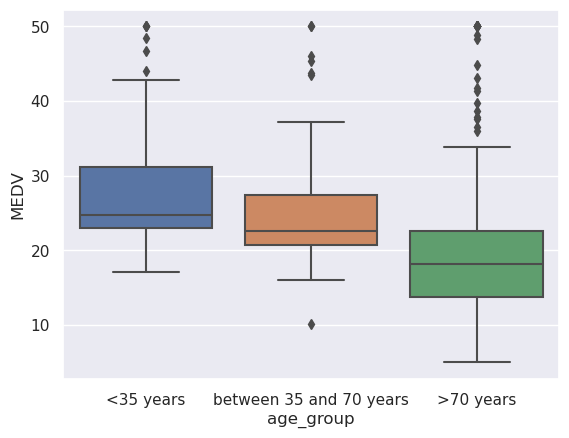

In [264]:
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)

plt.show() 

### Question 3
Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 

#### Null-hypothesis: 
There is no correlation between the concentrations of nitric oxide and the proportion of non-retail business acres per town.

#### Method: 
Pearson Correlation

#### Fields of concern:
INDUS, NOX

In [271]:
#We use the Pearson R method provided by the Scipy Stats package.

r_statistic, p_value = scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])
print('p-value:', p_value)
print('R-squared:', (r_statistic)*(r_statistic))

p-value: 7.913361061239527e-98
R-squared: 0.5831635323844072


We find the p-value is much less than 0.05, and thus, the we reject the null-hypothesis that there is no correlations between concentrations of nitric oxide and proportion of non-retail business acre per town. 

Notice that the resulting Pearson r is consistent with the R^2 from the regression analysis done previously.

### Question 4
What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

#### Null-hypothesis: 
There is no correlation between the weighted distance to the five Boston employment centres on the median value of owner occupied homes.

#### Method: 
Linear Regression

#### Fields of concern:
DIS, MEDV

18.390088330493388 [1.09161302] 0.062464372121782574


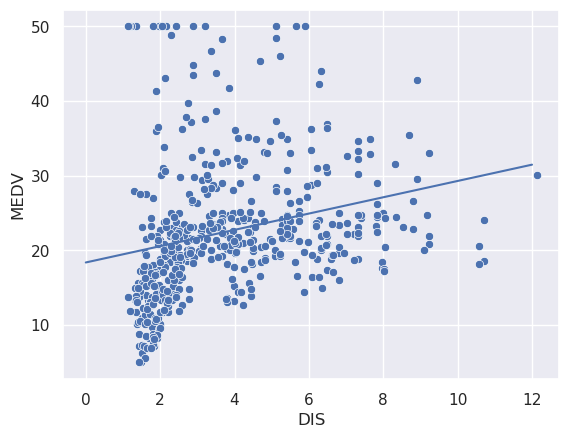

In [290]:
#First, we plot a quick scatter plot and a line of best fit for visual analysis.

ax = sns.scatterplot(x='DIS', y='MEDV', data=boston_df)

#set model to use as a linear regression model with a non-zero y-intercept 
model = LinearRegression(fit_intercept=True)

X, Y = boston_df[["DIS"]].to_numpy(), boston_df.MEDV.to_numpy()

#create the fit of the model
model.fit(X, Y)

xfit = np.linspace(0, 12, 506)
yfit = model.predict(xfit[:, np.newaxis])

#create line plot of fit values
plt.plot(xfit, yfit)

print(model.intercept_, model.coef_,model.score(X,Y))

We perform a more detailed analysis using the OLS regression feature of statsmodels.api

In [292]:
import statsmodels.api as sm
x = boston_df['DIS']
x = sm.add_constant(x)
y = boston_df['MEDV']
model = sm.OLS(y,x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 24 May 2023   Prob (F-statistic):           1.21e-08
Time:                        07:05:02   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Conlusion__: p<0.05 and our confidence interval does not include 0; there is evidence of correlation between DIS and the median value of owner-occupied homes.

## Author

Erik Smith